# K-Means - Circular Data

In [62]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [63]:
df = pd.read_csv("../data/circular_data.csv")
df.sample(10)

,x,y,cluster
95,-57.043079,89.046693,1
714,-278.775712,-190.904787,2
1596,-458.017084,-306.622605,3
1435,-495.424341,141.737916,3
206,-62.153597,-90.200880,1
1456,-504.380329,150.774593,3
1342,-342.486770,408.429170,3
2070,-483.000000,-547.000000,4
462,-7.869270,253.977637,2
393,188.866258,202.684091,2


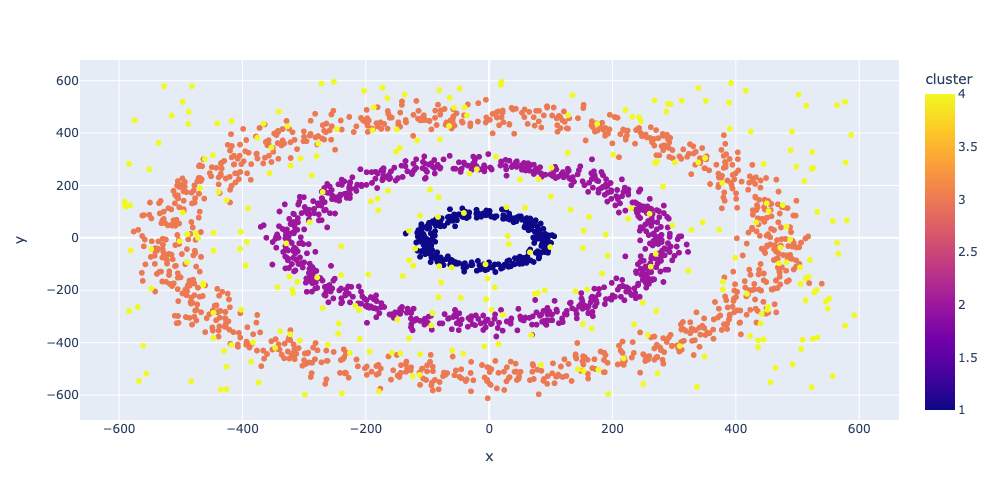

In [64]:
fig = px.scatter(df,
                    x="x",
                    y="y",
                    color="cluster",
                    height=500)
fig.show()

## DBSCAN

In [87]:
X = df[['x', 'y']]

dbscan = DBSCAN(eps=35, min_samples=6, n_jobs=-1)
df["predicted"] = dbscan.fit_predict(X)

In [88]:
df.sample(10)

,x,y,cluster,predicted
488,-40,281,2,1
758,-175,-265,2,1
1415,-502,194,3,2
302,275,-16,2,1
246,35,-108,1,0
628,-314,35,2,1
1061,474,117,3,2
1202,102,467,3,2
2032,-211,-276,4,1
1533,-557,-101,3,2


In [89]:
df.describe()

,x,y,predicted
count,2300.000000,2300.000000,2300.000000
mean,-18.331739,-19.538261,1.181304
std,291.740621,290.002487,0.932100
min,-591.000000,-612.000000,-1.000000
25%,-262.000000,-257.250000,1.000000
50%,-16.500000,-19.000000,1.000000
75%,220.000000,219.000000,2.000000
max,592.000000,596.000000,2.000000


In [90]:
df = df.astype({"x": int,
                "y": int,
                "cluster": "category",
                "predicted": "category"})

## Visualization

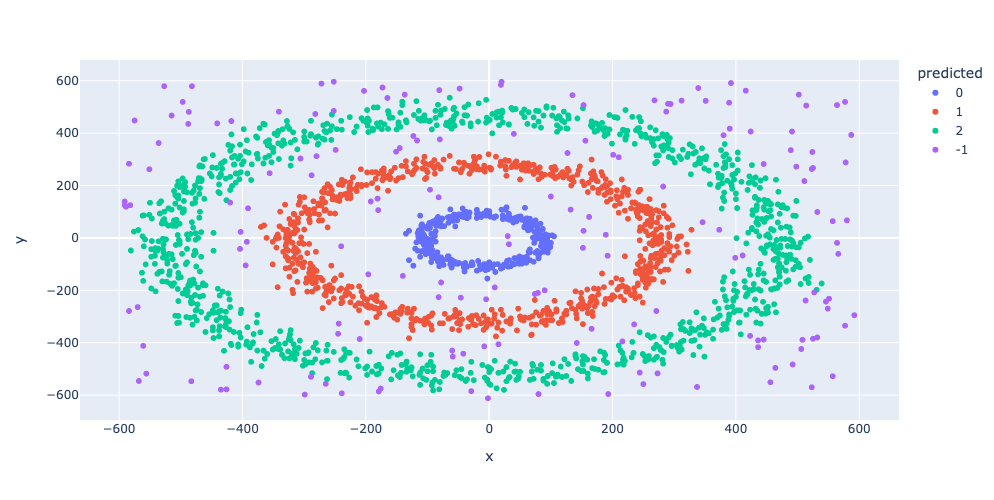

In [91]:
fig = px.scatter(df,
                    x="x",
                    y="y",
                    color="predicted",
                    height=500)
fig.show()

## Nearest Neighbors

Now we can find Nearest Neighbors to find proper eps value.

In [94]:
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)

distances

array([[  0.        ,   0.        ,   2.        ,   2.82842712],
       [  0.        ,   0.        ,   2.23606798,   2.82842712],
       [  0.        ,   0.        ,   2.23606798,   3.        ],
       ...,
       [  0.        ,  87.36704184,  92.43916919, 106.11785901],
       [  0.        ,  90.52071586,  96.87620967, 106.11785901],
       [  0.        , 102.92715871, 105.39449701, 134.18271126]])

In [95]:
# only extracting the second column since the first one is all zeros
distances = distances[:,1]
distances

array([  0.        ,   0.        ,   0.        , ...,  87.36704184,
        90.52071586, 102.92715871])

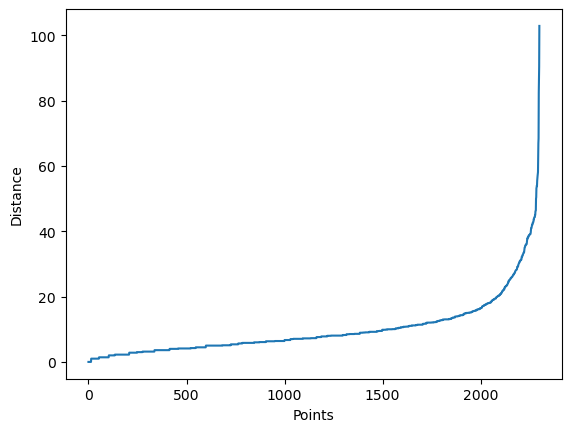

In [96]:
sns.lineplot(x=list(range(len(distances))), y=distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()